In [163]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
class LogReg:
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.m = len(y)
        self.bgd = False


    def sigmoid(self,z):
        return 1/ (1 + np.exp(-z))

    def cost_function(self,X,y):
        h = self.sigmoid(X.dot(self.thetas.T))
        m = len(y)
        J = (1/m) * (-y.dot(h) - (1-y).dot(np.log(1-h)))
        return J
    
    def add_intercept_term(self,X):
        X = np.insert(X,0,np.ones(X.shape[0:1]),axis=1).copy()
        return X

    def feature_scale(self,X):
        X = (X - X.mean()) / (X.std())
        return X

    def initialise_thetas(self):
        np.random.seed(42)
        self.thetas = np.random.rand(self.X.shape[1])

    def batch_gradient_descent(self,alpha,n_iterations):
        self.cost_history = [0] * (n_iterations)
        self.n_iterations = n_iterations

        for i in range(n_iterations):
            h = self.sigmoid(np.dot(self.X,self.thetas.T))
            gradient = alpha * (1/self.m) * (h - self.y).dot(self.X)
            self.thetas = self.thetas - gradient
            self.cost_history[i] = self.cost_function(self.X,self.y)

        return self.thetas


    def fit(self,alpha=0.4,n_iterations=2000):
        self.X = self.feature_scale(self.X)
#         self.add_intercept_term(self.X)
        self.initialise_thetas()
        self.thetas = self.batch_gradient_descent(alpha,n_iterations)

    def plot_cost_function(self):
        plt.plot(range((self.n_iterations)),self.cost_history)
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost Function')
        plt.title('Gradient Descent Cost Function Line Plot')
        plt.show()

    def predict(self,X_test):
        self.X_test = X_test.copy()
        self.X_test = self.feature_scale(self.X_test)
        h = self.sigmoid(np.dot(self.X_test,self.thetas.T))
        predictions = (h >= 0.5).astype(int)
        return h

In [180]:
whole_data = pd.read_csv("Data/trac2_eng_train.csv")
le = LabelEncoder()
whole_data['Y'] = le.fit_transform(whole_data["Sub-task A"])
df = pd.read_csv("Cache/Embeddings/lda_vecs_en.csv")
df["Y"] = whole_data["Y"]
print(df.shape, whole_data.shape)
df = pd.get_dummies(df, columns=['Y'])

(4263, 17) (4263, 5)


In [181]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Y_0,Y_1,Y_2
0,0.035714,0.035714,0.035714,0.035714,0.035714,0.535712,0.035715,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,9,2,0,1,0
1,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429,35,4,0,1,0
2,0.767853,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017858,0.017857,0.017857,0.017857,0.017857,0.017857,25,5,0,1,0
3,0.001661,0.001661,0.086649,0.001661,0.042266,0.001661,0.001661,0.038026,0.163217,0.058207,0.001661,0.001661,0.598345,0.001661,540,83,0,1,0
4,0.007937,0.119051,0.007937,0.123133,0.119957,0.007937,0.007937,0.558491,0.007937,0.007937,0.007937,0.007937,0.007937,0.007937,105,15,0,1,0


In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, :-3], df.iloc[:, -3:], random_state = 0, test_size = 0.3)

In [182]:
X_train, Y_train = df.iloc[:, :-3], df.iloc[:, -3:]

In [183]:
model0 = LogReg(X_train.values, Y_train.iloc[:, 0].values)
model1 = LogReg(X_train.values, Y_train.iloc[:, 1].values)
model2 = LogReg(X_train.values, Y_train.iloc[:, 2].values)
model0.fit(alpha=0.05, n_iterations=2000)
model1.fit(alpha=0.05, n_iterations=2000)
model2.fit(alpha=0.05,n_iterations=2000)
pred0 = model0.predict(X_train)
pred1 = model1.predict(X_train)
pred2 = model2.predict(X_train)

In [185]:
pred = np.array(pred0)
for i in range(Y_train.shape[0]):
    m = max(pred0[i], pred1[i], pred2[i])
    if(pred0[i]==m): pred[i] = 0
    if(pred1[i]==m): pred[i] = 1
    if(pred2[i]==m): pred[i] = 2
print(classification_report(whole_data["Y"].values, pred))
print(confusion_matrix(whole_data["Y"].values, pred))

              precision    recall  f1-score   support

           0       0.17      0.39      0.24       453
           1       0.83      0.53      0.65      3375
           2       0.11      0.26      0.15       435

    accuracy                           0.49      4263
   macro avg       0.37      0.39      0.35      4263
weighted avg       0.69      0.49      0.56      4263

[[ 177  189   87]
 [ 701 1801  873]
 [ 146  176  113]]


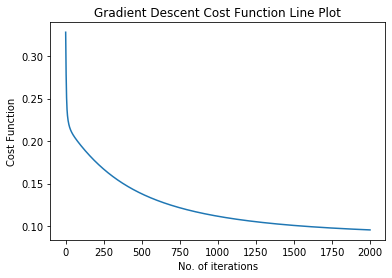

In [186]:
model0.plot_cost_function()